In [1]:
!pip  install kaggle
!pip install nbconvert
from IPython.display import Markdown
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from IPython.display import HTML
css_style='''

<style>
/* Stili CSS */
h1 {
    color: red;
}

h2, h3 {
    background-color: #FFEFD5;
    color: black;
}
</style>
'''

display(HTML(css_style))


<h1> I migliori 1000 film secondo IMDB</h1>
<p> IMDb, acronimo di Internet Movie Databes, fondato nel 1990, rappresenta il più grande database online dedicato al cinema. Contiene informazioni complete su tutti i dati d'interesse relativi al cinema, come  film, serie TV, registi, attori, sceneggiatori, produttori e altre figure dell'industria. </p>
<h3> Motivazioni: </h3>
<ul>
    <li> Passione per il cinema; </li>
    <li> Curiosità;</li>
    <li> Interesse personale; </li>
    <li> Ricerca di tendenze; </li>
</ul>

<h3>  Domande a cui rispondere: </h3>
<ul> 
    <li> Quali sono i generi più rappresentati? </li>
    <li> Qual è il numero di film usciti per ogni decennio? </li>
    <li> Qual è l'andamento della valutazione e della durata media dei film nel corso dei decenni? </li>
    <li> Esiste una correlazione tra durata e valutazione? </li>
    <li> Qual è l'andamento degli incassi e quali sono i 10 film che hanno generato più guadagni?</li>
    <li> Quali sono i 10 film con una valutazione migliore? </li>
    <li> Quali sono i primi 5 registi per numero di film migliori? </li>

</ul> 


<h2> Il dataset</h2>
<p> Il dataset utilzzato è il seguente: <a href="https://www.kaggle.com/datasets/harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows">  Top 1000 IMDB </a> </p>
<p> Il dataset è stato creato nel 2021, mancano perciò i dati relativi ai film usciti negli ultimi 3 anni. </p>
<p> Contiene dati molto interessanti e utili per analizzare diverse tendenze, manca però il dato sull'età minima per vedere un film.</p>
<p> Per l'analisi sono stati utilizzati la maggior parte dei dati, esclusi poster_link, certificate, overwiew e meta_score. </p>



<h3> I dati </h3>
<ul>
    <li> Poster_link: link di reindirizzamento per la visione; </li>
    <li> Series_Title: titolo del Film; </li>
    <li> Released_Year: anno di uscita;</li>
    <li> Certificate: certificazione del film;</li>
    <li> Runtime: durata in minuti; </li>
    <li> Genre: generi; </li>
    <li> IMDB_Rating: valutazione su IMDb; </li>
    <li> Overview: breve descrizione del film; </li>
    <li> Metascore: valutazione della critica; </li>
    <li> Director: regista; </li>
    <li> Star: attori principali; </li>
    <li> No_of_Votes: numero di voti; </li>
    <li> Gross: incasso; </li>
</ul>

In [3]:
csv_file_name = 'imdb_top_1000.csv'
df=pd.read_csv(csv_file_name)


<h2> I generi più rappresentati </h2>
<p> Attenzione: un film può contenere più generi.</p>


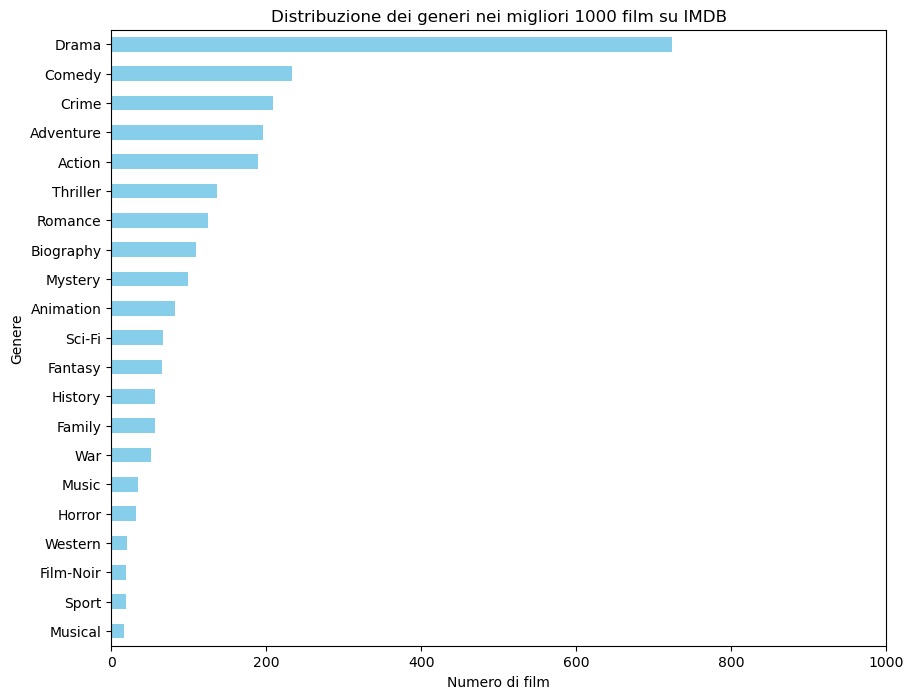

In [4]:
#Generi 
df['Genre'] = df['Genre'].apply(lambda x: [genre.strip() for genre in x.split(',')])
allGenres=[]
for genres in df['Genre']:
    allGenres.extend(genres)
genre_count=pd.Series(allGenres).value_counts()
genre_count
plt.figure(figsize=(10, 8))
genre_count.plot(kind='barh', color='skyblue')
plt.title('Distribuzione dei generi nei migliori 1000 film su IMDB')
plt.xlabel('Numero di film')
plt.ylabel('Genere')
plt.xlim(0, 1000)
plt.gca().invert_yaxis()  # Inverte l'ordine dei generi per visualizzare il più rappresentato in alto

plt.show()

<p> Si nota come il genere 'Drama' sia nettamente in testa rispetto agli altri, apparendo 724 volte. A livello percentuale però, come sono distribuiti i primi 5 film per genere? </p> 

<h3> Distribuzione in percentuale dei top 5 generi </h3>

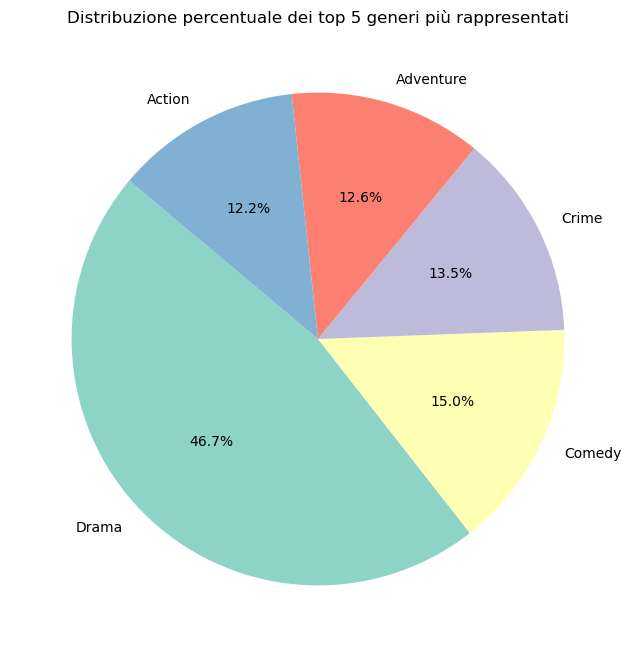

In [5]:
#Primi 5 generi
topGenres=genre_count.head(5)
plt.figure(figsize=(8, 8))
plt.pie(topGenres.values, labels=topGenres.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3.colors)
plt.title('Distribuzione percentuale dei top 5 generi più rappresentati')
plt.show()

<h2> Numero di film usciti per decennio </h2>
<h3> Panoramica generale </h3>

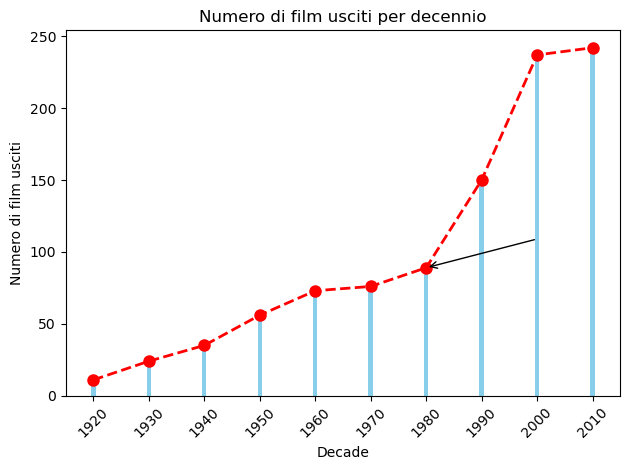

In [6]:
#Numero di film usciti per decennio

df['Released_Year'] = df['Released_Year'].astype(str)
df = df[df['Released_Year'].str.isnumeric()]
df['Released_Year'] = df['Released_Year'].astype(int)

df['Decade'] = df['Released_Year'] // 10 * 10
df = df[df['Released_Year'] != 2020]
decadeCounts = df['Decade'].value_counts().sort_index()
bars = plt.bar(decadeCounts.index, decadeCounts.values, color='skyblue')

max_values = [decadeCounts[dec] for dec in decadeCounts.index]
plt.plot(decadeCounts.index, max_values, marker='o', color='r', linestyle='--', linewidth=2, markersize=8)

plt.title('Numero di film usciti per decennio')
if 1980 in decadeCounts.index:
    decade_1980 = 1980
    max_value_1980 = decadeCounts[decade_1980]
    plt.annotate('', xy=(decade_1980, max_value_1980), xytext=(decade_1980 + 20, max_value_1980 + 20),
                 arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=12, ha='left', va='bottom')

plt.xlabel('Decade')
plt.ylabel('Numero di film usciti')
plt.xticks(decadeCounts.index, rotation=45)
plt.tight_layout()
plt.show()


<p> Si nota come dal 1980 in poi la produzione di film sia aumentata esponenzialmente .</p>

<h3> Distribuzione dei film prima e dopo il 2000</h3>

<p> Il grafico a torta rende evidente come in proporzione la produzione di film dopo il 2000 sia aumentata notevolmente, grazie sopratutto al miglioramento delle tecnologie. </p>

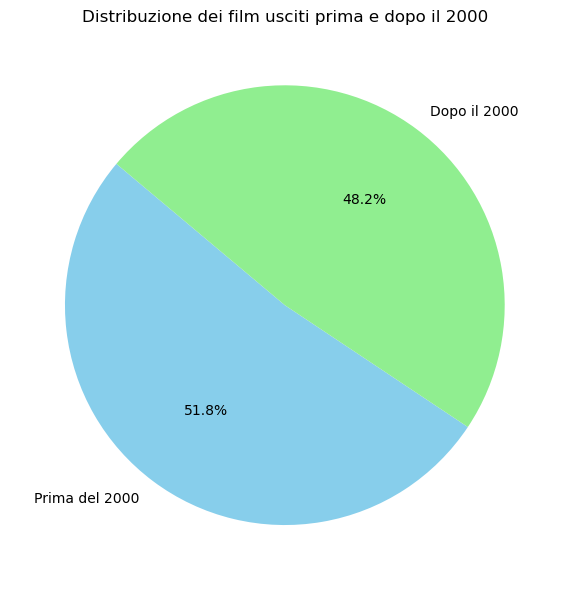

In [7]:
#Film prima e dopo del 2000
film_after_2000=df[df['Released_Year']>=2000].shape[0]
film_before_2000=df[df['Released_Year']<2000].shape[0]
labels = ['Prima del 2000', 'Dopo il 2000']
values = [film_before_2000, film_after_2000]
plt.figure(figsize=(8, 6))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen'])

plt.title('Distribuzione dei film usciti prima e dopo il 2000')

plt.tight_layout()
plt.show()



<h2> Valutazione e durata media </h2>
<h3> Valutazione media: </h3>

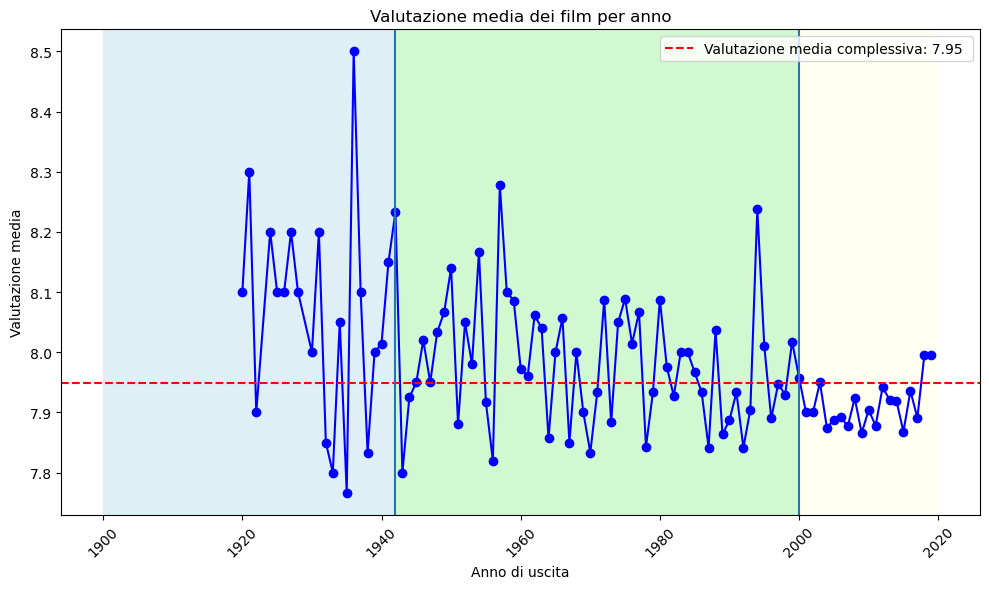

In [8]:
#Valutazioni medie dei film per anno
meanRating_by_year= df.groupby('Released_Year')['IMDB_Rating'].mean()
mediaTot= df['IMDB_Rating'].mean()
plt.figure(figsize=(10, 6))
plt.plot(meanRating_by_year.index, meanRating_by_year.values, marker='o', linestyle='-', color='b')
plt.title('Valutazione media dei film per anno')
plt.xlabel('Anno di uscita')
plt.ylabel('Valutazione media')
plt.axhline(y=mediaTot, color='r', linestyle='--', label=f'Valutazione media complessiva: {mediaTot:.2f} ')
plt.axvline(x=2000)
plt.axvline(x=1942)
plt.axvspan(1900,1942, facecolor='lightblue', alpha=0.4)
plt.axvspan(1942,2000, facecolor='lightgreen', alpha=0.4)
plt.axvspan(2000,2020, facecolor='lightyellow', alpha=0.4)
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(loc='upper right')
plt.show()


<p> Il grafico mostra come si possano individuare tre periodi. Il primo periodo (1900-1940), con valutazioni costantemente sopra la media, il secondo (1940-2000), con oscillazioni costanti tra sopra e sotto la media e il terzo periodo (2000-2020), con valutazioni costantemente sotto la media. Naturalmente i film più 'antichi' risentono di una valutazione maggiore data la minor quantità di film. </p>


<h3> Durata media </h3>

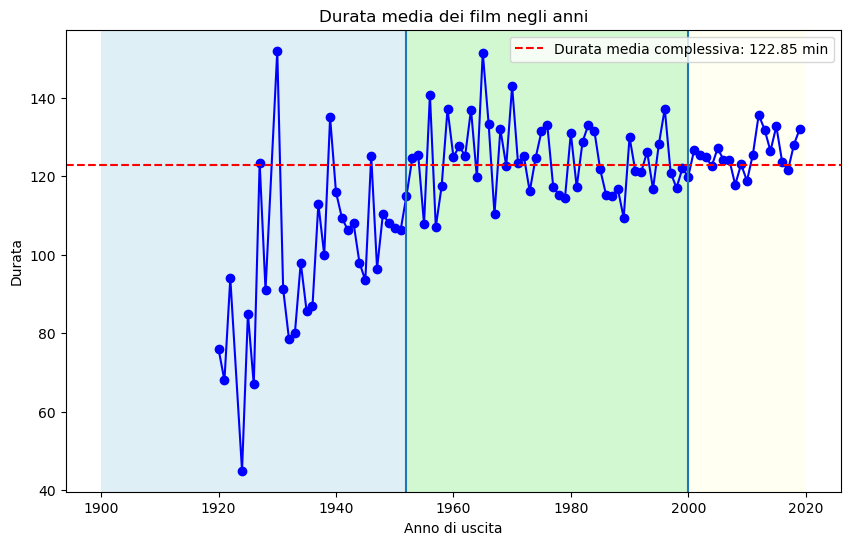

In [9]:
#Durata 
def extractMinutes(Runtime):
    try:
        return int(Runtime.split(' ')[0])  
    except:
        return None 
df_clean = df.copy()
df_clean['Runtime'] = df_clean['Runtime'].apply(extractMinutes)

meanDuration=df_clean['Runtime'].mean()
meanDuration_by_year= df_clean.groupby('Released_Year')['Runtime'].mean()
meanDuration_by_year

plt.figure(figsize=(10,6))
plt.plot(meanDuration_by_year.index, meanDuration_by_year.values, marker='o', color='b')
plt.axhline(y=meanDuration, color='r', linestyle='--', label=f'Durata media complessiva: {meanDuration:.2f} min')
plt.title('Durata media dei film negli anni')
plt.xlabel('Anno di uscita')
plt.ylabel('Durata')
plt.legend()
plt.axvline(x=1952)
plt.axvline(x=2000)
plt.axvspan(1900,1952, facecolor='lightblue', alpha=0.4)
plt.axvspan(1952,2000, facecolor='lightgreen', alpha=0.4)
plt.axvspan(2000,2020, facecolor='lightyellow', alpha=0.4)
plt.show()

<p> Anche qui possiamo distinguere in tre periodi diversi: il primo periodo (1900-1953), con durata costantemente sotto la media, il secondo periodo (1953-2000), con oscillazioni costanti e il terzo periodo (2000-2020), con durata per lo più sopra la media. </p>
<p> La durata dei film è quindi aumentata nel corso degli anni. Viene ora da chiedersi  se esiste una correlazione tra durata e valutazione.</p>

<h2> Correlazione tra durata e valutazione </h2>

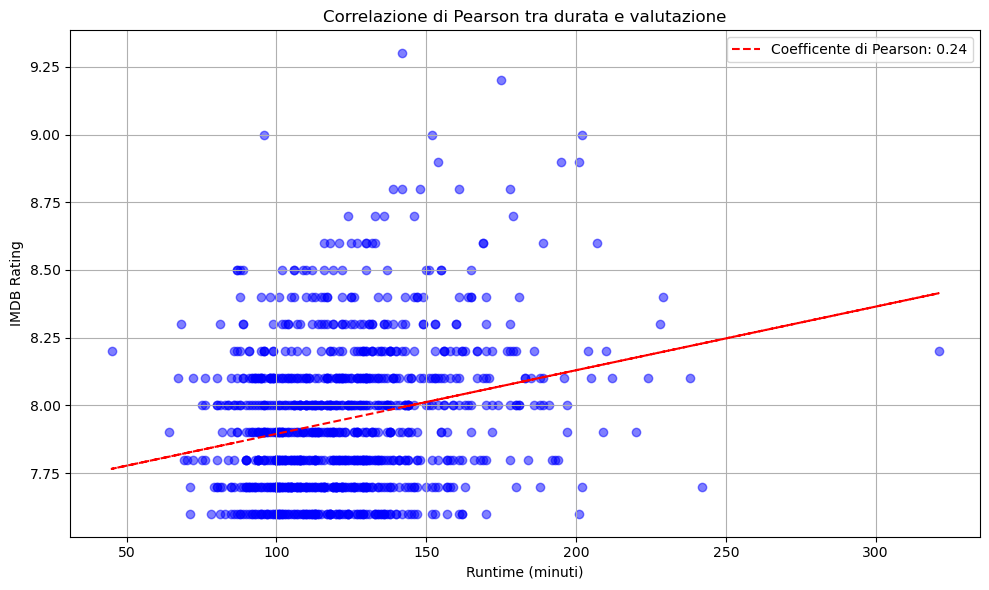

In [10]:
correlation = df_clean[['Runtime', 'IMDB_Rating']].corr().iloc[0, 1]

plt.figure(figsize=(10, 6))
plt.scatter(df_clean['Runtime'], df_clean['IMDB_Rating'], alpha=0.5, color='b')
plt.title('Correlazione di Pearson tra durata e valutazione')
plt.xlabel('Runtime (minuti)')
plt.ylabel('IMDB Rating')
plt.grid(True)
plt.tight_layout()

z = np.polyfit(df_clean['Runtime'].dropna(), df_clean['IMDB_Rating'].dropna(), 1)
p = np.poly1d(z)
plt.plot(df_clean['Runtime'], p(df_clean['Runtime']), "r--", label=f'Coefficente di Pearson: {correlation:.2f}')

plt.legend(loc='upper right')
plt.show()

<p> Esiste quindi un correlazione debole (0.24) tra durata e valutazione. All'aumentare della durata si ha un lieve aumento della valutazione, ma la correlazione non è abbastanza forte per essere considerata predittiva.  </p>
<p> La durata è quindi solo uno dei tanti fattori che concorrono alla valutazione finale. </p>

<h2> Andamento degli incassi </h2> 

<p> Si è visto come la produzione di film sia aumentata esponenzialmente dal 1980 ad oggi. Viene naturale domandarsi se anche gli incassi siano auementati nella medesima proporzione. </p>

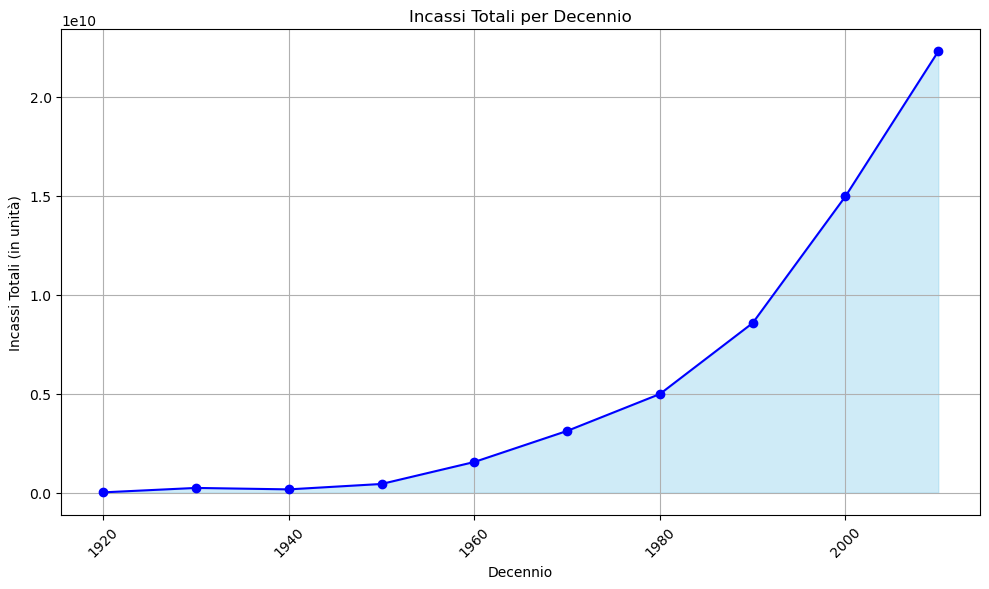

In [11]:
#Decenni con gli incassi maggiori

def convert_gross(gross):
    try:
        return float(str(gross).replace(',', ''))
    except ValueError:
        return 0  # O qualche valore di default se c'è un problema

df['Gross'] = df['Gross'].apply(convert_gross)
revenue_by_decade = df.groupby('Decade')['Gross'].sum()

plt.figure(figsize=(10, 6))
plt.fill_between(revenue_by_decade.index, revenue_by_decade.values, color='skyblue', alpha=0.4)
plt.plot(revenue_by_decade.index, revenue_by_decade.values, marker='o', color='b')
plt.title('Incassi Totali per Decennio')
plt.xlabel('Decennio')
plt.ylabel('Incassi Totali (in unità)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<p> Il grafico mostra come anche gli incassi seguano il "modello esponenziale" di crescita dal 1980 in poi</p>

<h2> Migliori dieci film per incassi </h2>


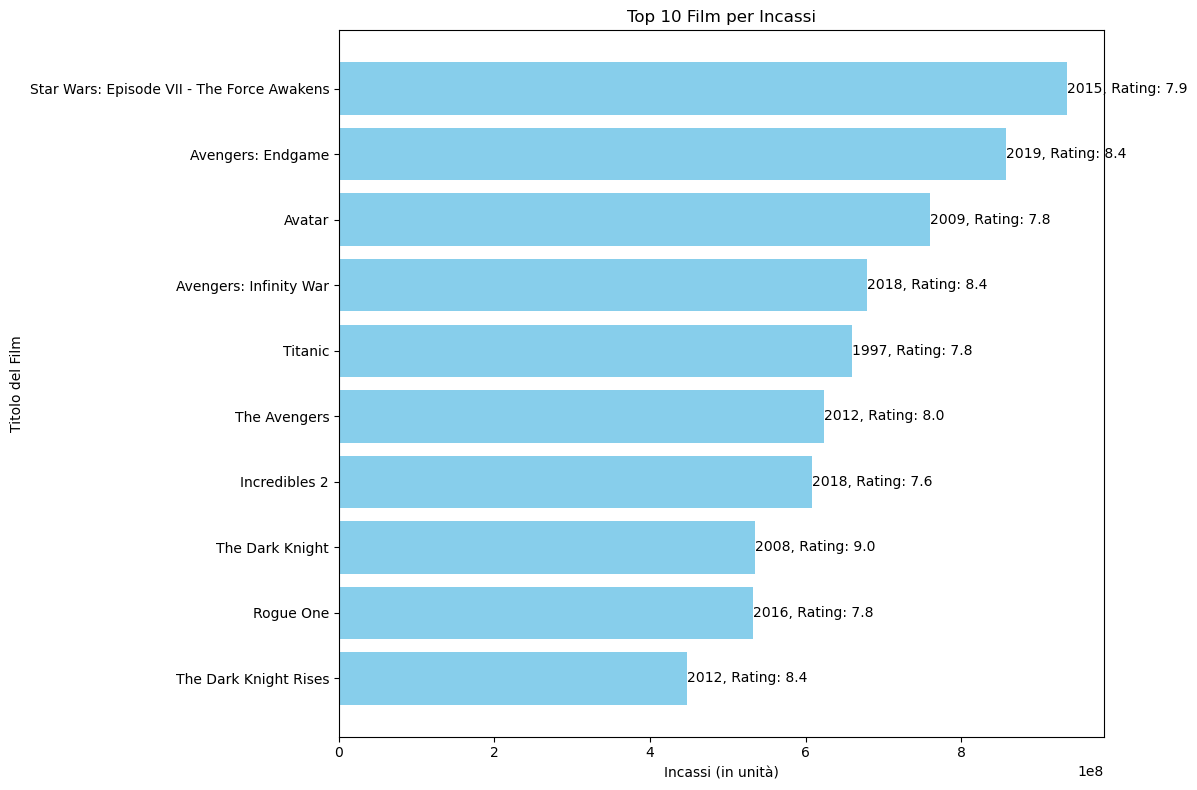

In [12]:
#Top 10 film per incassi
top_10_films = df.sort_values(by='Gross', ascending=False).head(10)


plt.figure(figsize=(12, 8))
bars = plt.barh(top_10_films['Series_Title'], top_10_films['Gross'], color='skyblue')
plt.xlabel('Incassi (in unità)')
plt.ylabel('Titolo del Film')
plt.title('Top 10 Film per Incassi')

for bar, release_year, imdb_rating in zip(bars, top_10_films['Released_Year'], top_10_films['IMDB_Rating']):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,  f'{release_year}, Rating: {imdb_rating}', 
             ha='left', va='center', fontsize=10)

plt.gca().invert_yaxis()  

plt.tight_layout()
plt.show()


<p> E' interessante notare come tutti i film presenti nel grafico siano posteri al 2000, escluso Titanic. </p>

<h2> 10 film con una valutazione migliore </h2>

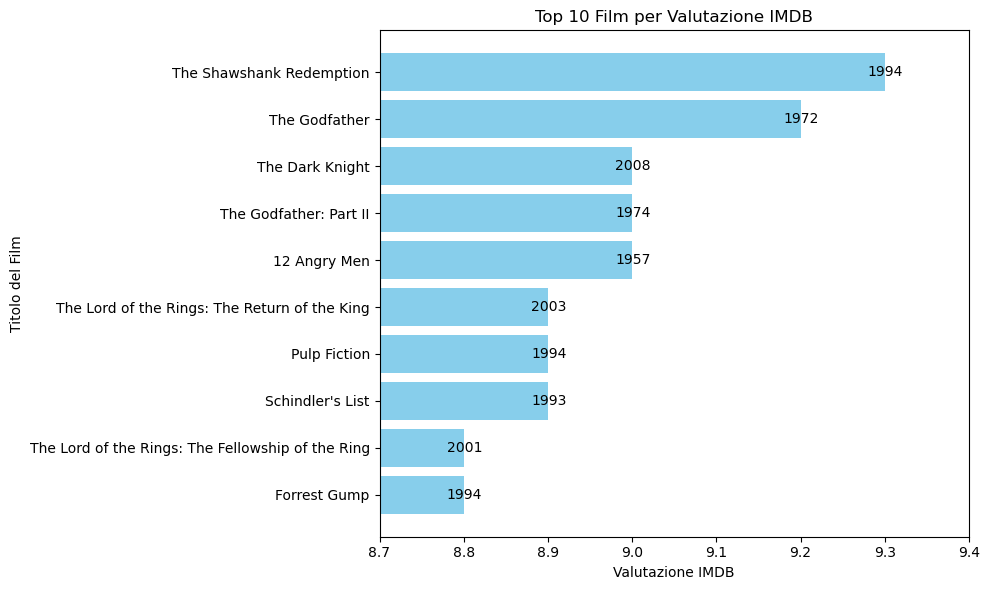

In [13]:
#Top 10 film con valutazioni migliori
top_10_films = df.sort_values(by='IMDB_Rating', ascending=False).head(10)


plt.figure(figsize=(10, 6))
plt.barh(top_10_films['Series_Title'], top_10_films['IMDB_Rating'], color='skyblue')
plt.xlabel('Valutazione IMDB')
plt.ylabel('Titolo del Film')
plt.title('Top 10 Film per Valutazione IMDB')
plt.gca().invert_yaxis()  
plt.xlim(8.7, 9.4)

for bar, (_, row) in zip(bars, top_10_films.iterrows()):
    plt.text(row['IMDB_Rating'] - 0.02, bar.get_y() + bar.get_height() / 2, f'{row["Released_Year"]}', ha='left', va='center', fontsize=10, color='black')


plt.tight_layout()
plt.show()


<p> Dei seguenti film possiamo notare come solo 3 film siano usciti dal 2000 in poi, dimostrando come  all'aumentare della produzione di film non è detto che aumenti la qualità del prodotto.</p>

<h2> I migliori 5 registi </h2>

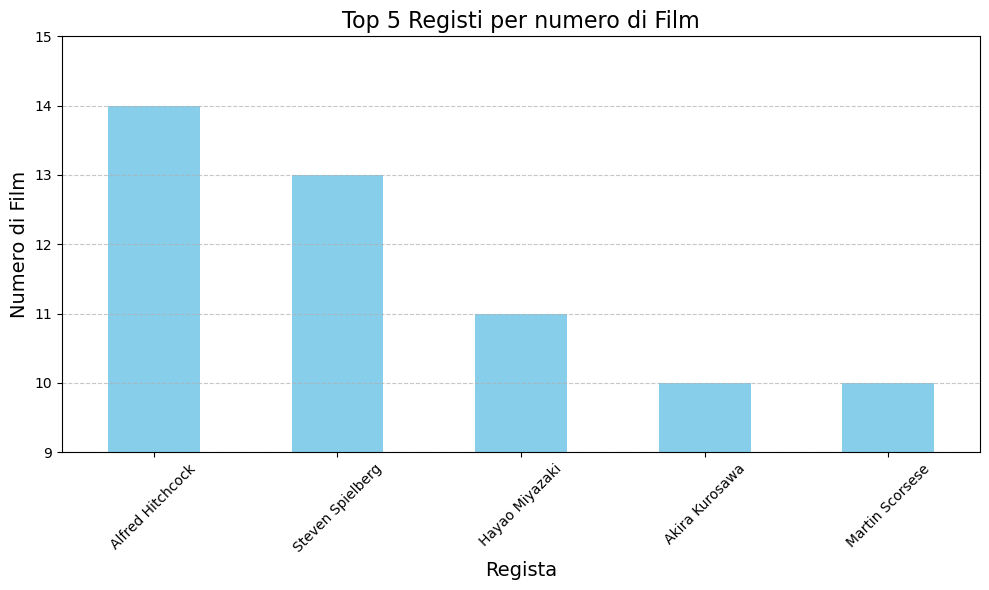

In [14]:
#Primi 5 registi
topDirector=df['Director'].value_counts().head(5)

plt.figure(figsize=(10, 6)) 
topDirector.plot(kind='bar', color='skyblue')

plt.title('Top 5 Registi per numero di Film', fontsize=16)
plt.xlabel('Regista', fontsize=14)
plt.ylabel('Numero di Film', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim([9, 15])

plt.tight_layout()
plt.show()

<h2> Conclusioni </h2> 

<p> Dall'analisi del dataset si possono trarre le seguenti conclusioni: </p> 
<ul>
    <li> Il genere decisamente più comune è il Drama; </li>
    <li> Il numero di film è aumentato esponenzialmente dal 1980 in poi; </li>
    <li> La durata media dei film è aumentata nel corso del tempo; </li>
    <li> La valutazione media non mostra una tendenza chiara, ma può comunque essere suddivisa in tre periodi; </li>
    <li> Esiste una correlazione debole tra durata e valutazione; </li>
    <li> Gli incassi sono aumentati conseguentemente all'aumentare della produzione, e i migliori 10 film per incassi sono stati             prodotti  quasi tutti dopo il 2000; </li>
</ul>
<p> L'obiettivo di andare alla ricerca di tendenza è stato quindi soddisfato, permettendo così di effettuare una panoramica            generale sul mondo del cinema attraverso i dati.</p>